# 20210429 Initial Analysis

In [38]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats

root_dir = "/Users/imaka/data/20210429/sta/"
root_dir = "/g/lu/data/imaka/onaga/20210429/sta/"
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Real time plots

50% EE radius = 0.350"


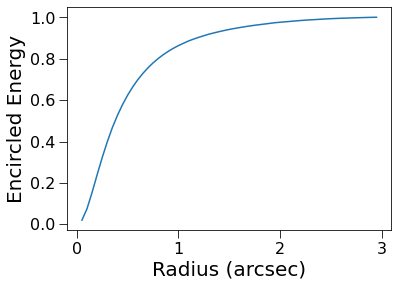

In [50]:
test_img_base = 'sta072docz2_c_scan'

from astropy.table import Table
ee = Table.read(root_dir + 'reduce/Fld2/ee/' + test_img_base + '_clean_ee.txt', format='ascii')

plt.plot(ee['Radius'], ee['EE'])
plt.xlabel('Radius (arcsec)')
plt.ylabel('Encircled Energy')

fdx = np.where(ee['EE'] < 0.5)[0][-1]
fwhm = ee['Radius'][fdx]

print(f'50% EE radius = {fwhm:.3f}"')

Play with a star list and look at trends in FWHM, etc. 

x: fwhm_x_avg = 0.42" fwhm_x_med = 0.41" fwhm_x_std = 0.02"
x: fwhm_x_avg = 0.42" fwhm_x_med = 0.41" fwhm_x_std = 0.02"


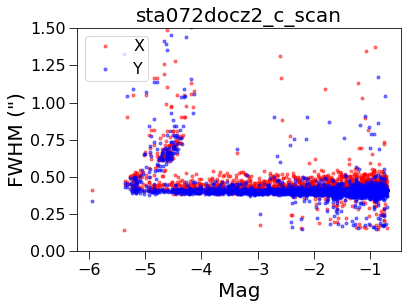

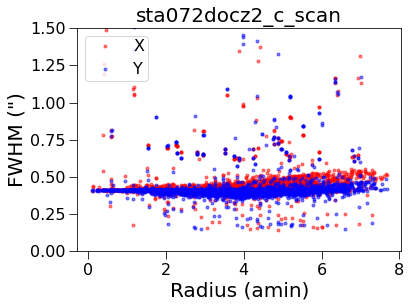

In [51]:
stars = Table.read(root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars.txt', format='ascii')

# Get the plate scale
img, hdr = fits.getdata(root_dir + 'Fld2/' + test_img_base + '.fits', header=True)
scale = util.get_plate_scale(img, hdr)
del img
del hdr

plt.figure()
plt.plot(stars['mag'], stars['x_fwhm'] * scale, 'r.', label='X', alpha=0.5)
plt.plot(stars['mag'], stars['y_fwhm'] * scale, 'b.', label='Y', alpha=0.5)
plt.xlabel('Mag')
plt.ylabel('FWHM (")')
plt.legend()
plt.ylim(0, 1.5)
plt.title(test_img_base)

plt.figure()
r = np.hypot(stars['xcentroid'] - (stars['xcentroid'].max() / 2.0), 
             stars['ycentroid'] - (stars['ycentroid'].max() / 2.0)) * scale / 60.0
plt.plot(r, stars['x_fwhm'] * scale, 'r.', label='X', alpha=0.5)
plt.plot(r, stars['y_fwhm'] * scale, 'b.', label='Y', alpha=0.5)
plt.xlabel('Radius (amin)')
plt.ylabel('FWHM (")')
plt.legend()
plt.ylim(0, 1.5)
plt.title(test_img_base)

fwhm_x_avg, fwhm_x_med, fwhm_x_std = sigma_clipped_stats(stars['x_fwhm'] * scale)
fwhm_y_avg, fwhm_y_med, fwhm_y_std = sigma_clipped_stats(stars['y_fwhm'] * scale)
print(f'x: fwhm_x_avg = {fwhm_x_avg:.2f}" fwhm_x_med = {fwhm_x_med:.2f}" fwhm_x_std = {fwhm_x_std:.2f}"')
print(f'x: fwhm_x_avg = {fwhm_x_avg:.2f}" fwhm_x_med = {fwhm_x_med:.2f}" fwhm_x_std = {fwhm_x_std:.2f}"')

In [ ]:
stats = table.read(root_dir + 'reduce/stats/stats_docz.fits')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


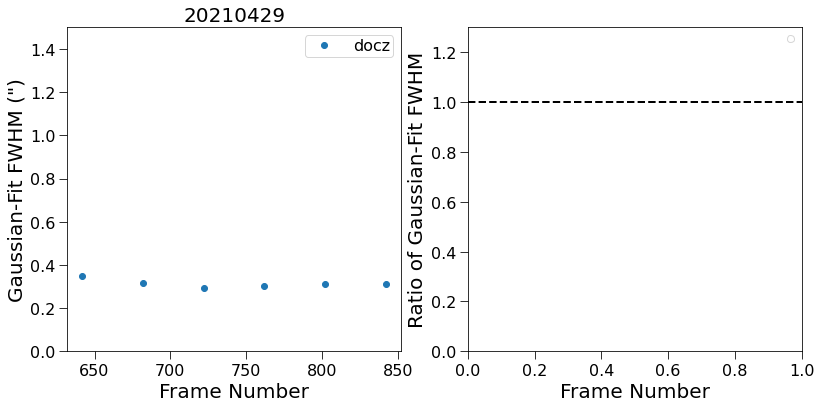

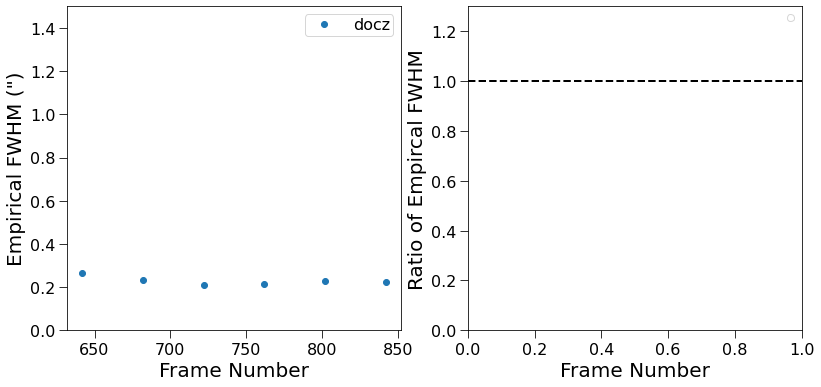

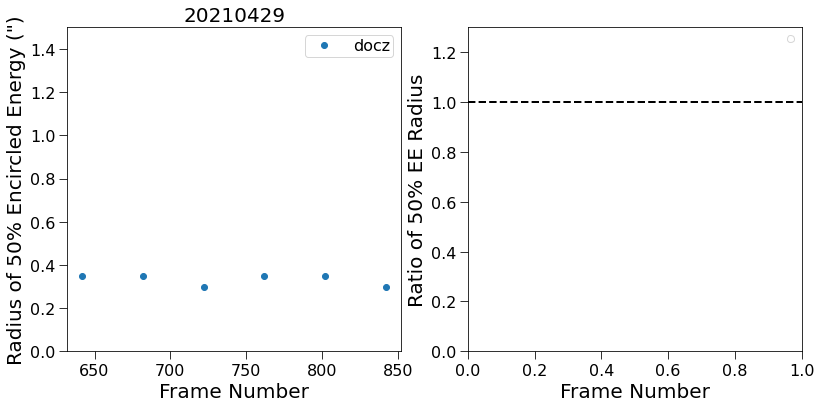

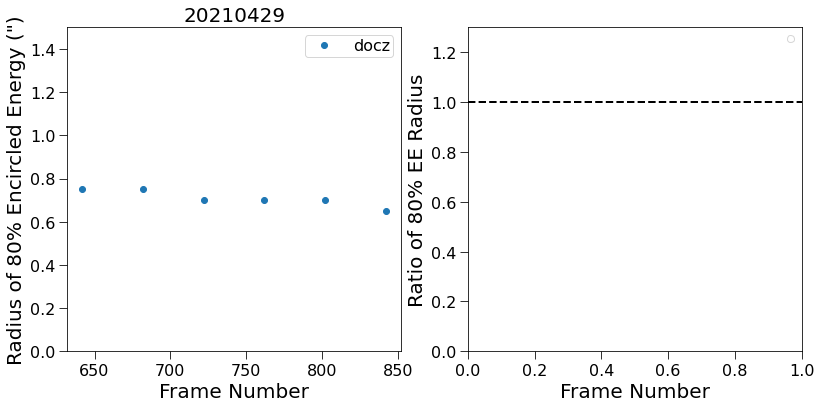

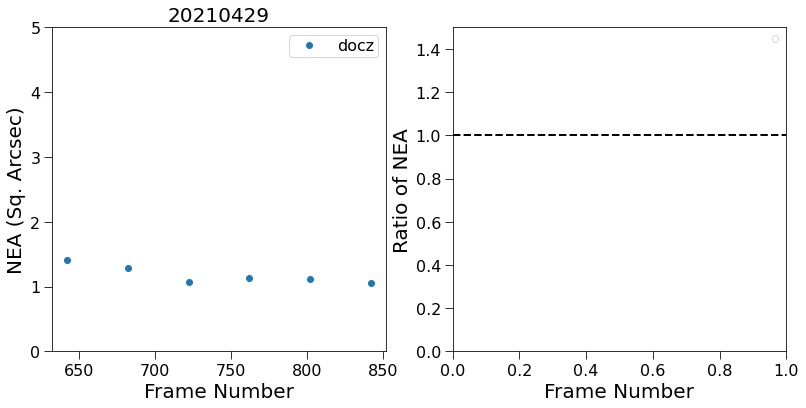

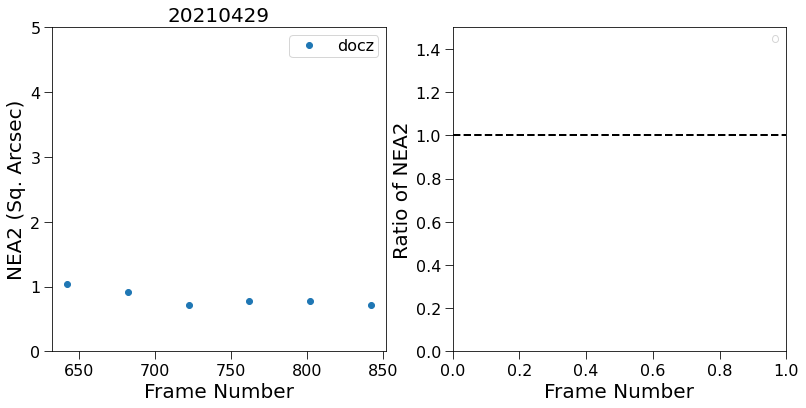

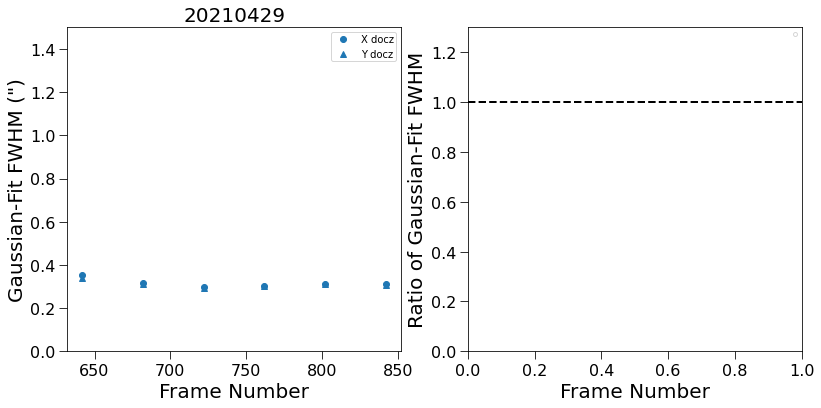

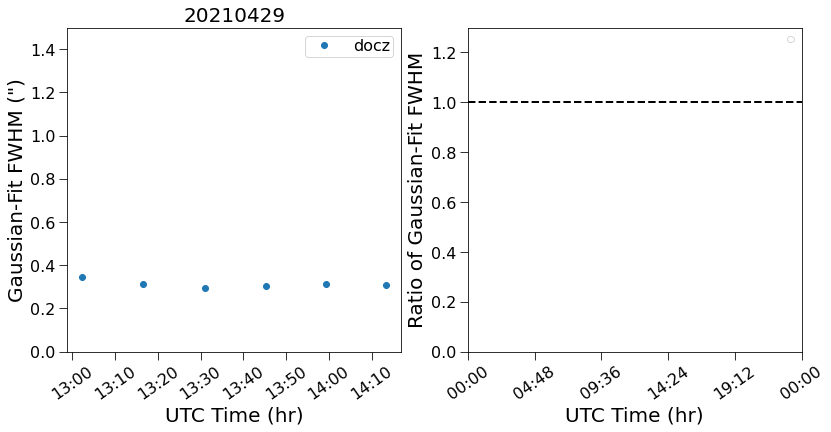

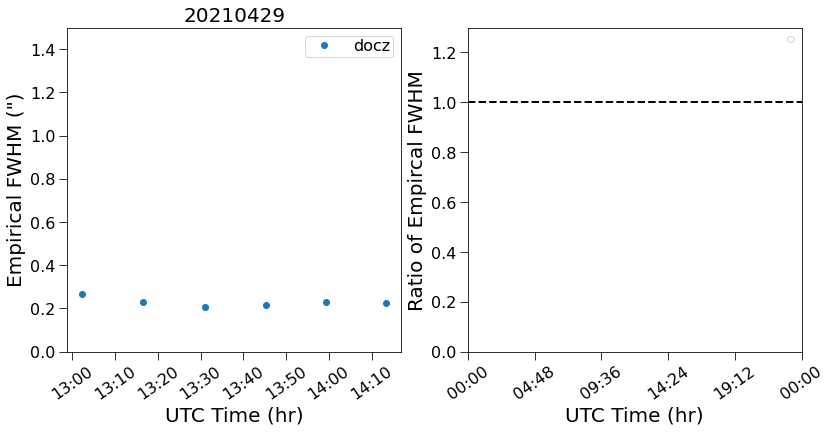

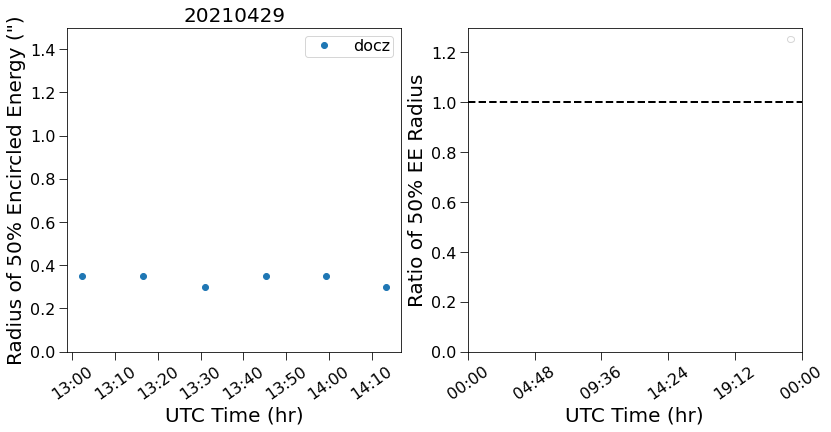

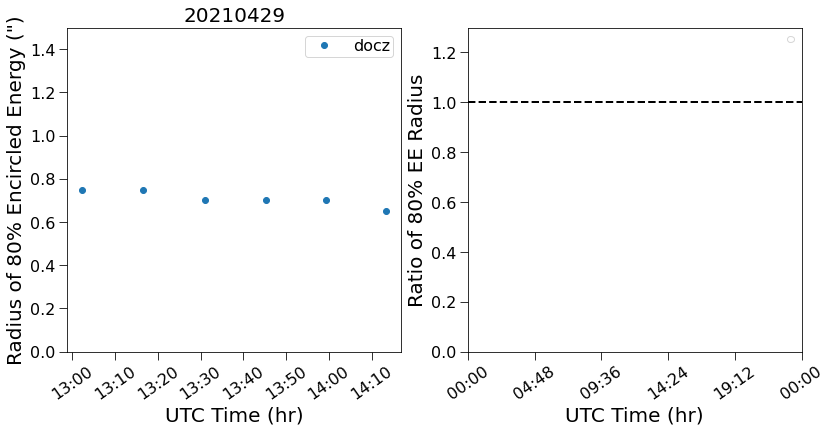

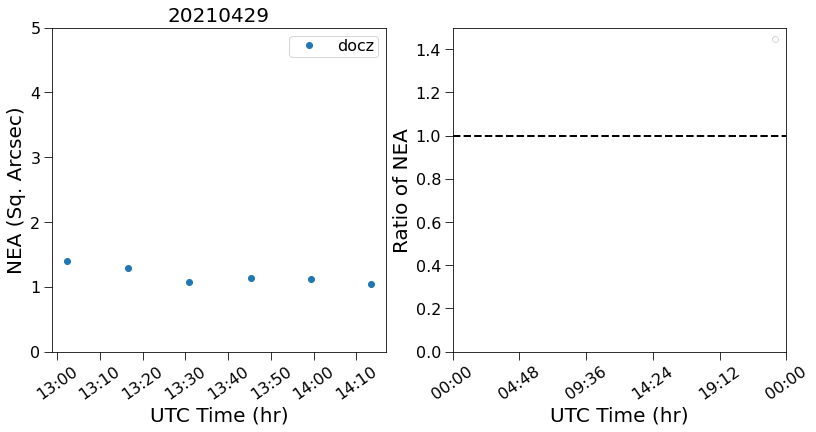

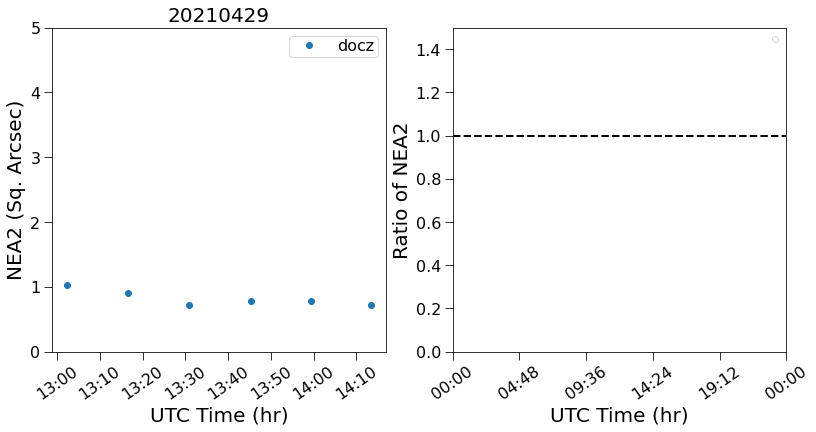

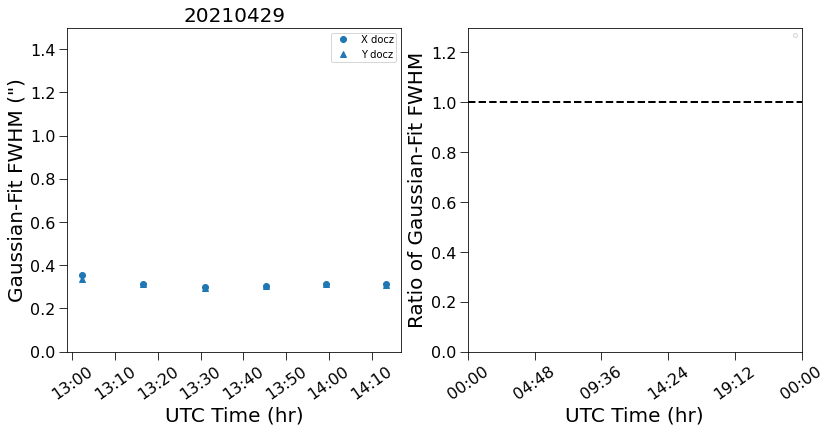

In [58]:
plot_stats.plot_stack_stats('20210429', suffixes=['docz'], root_dir=root_dir + '../../', reduce_dir='sta/reduce/')

# Time Variation w/MASS-DIMM

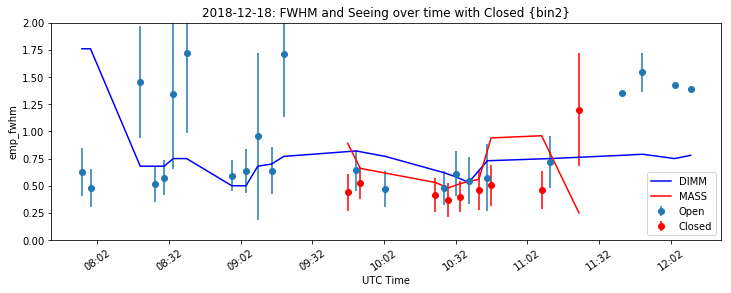

In [5]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file1 = stats_dir+ "stats_closed_LS_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2018-12-18: FWHM and Seeing over time with Closed {bin2}", plots_dir)

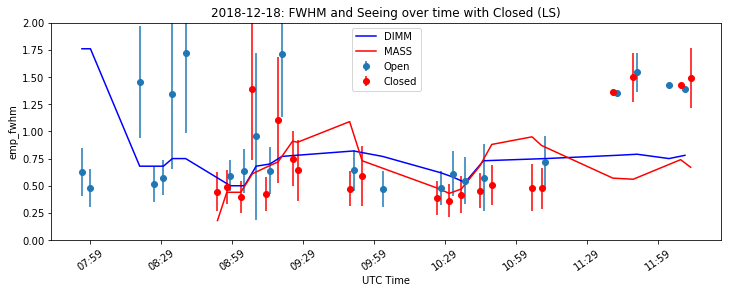

In [6]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file2 = stats_dir+ "stats_closed_B2_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file2, 'emp_fwhm', "2018-12-18: FWHM and Seeing over time with Closed (LS)", plots_dir)

# Aggregate Plots

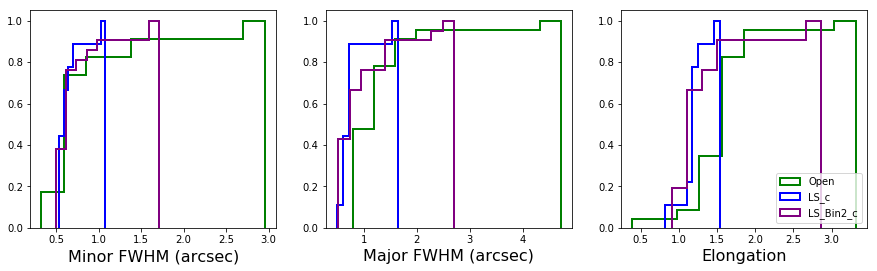

In [7]:
files = [open_file, closed_file1, closed_file2]
labels = ['Open', 'LS_c', 'LS_Bin2_c']
colors = ['g', 'b', 'purple']
plot_stats.comp_cdf(files, labels, colors)

# Field Variability

### Closed loop (Bin 2)

N Stars:  188
Mean:  0.4097462621130659
Median:  0.4126249071044955
Std Dev:  0.016702069361246637


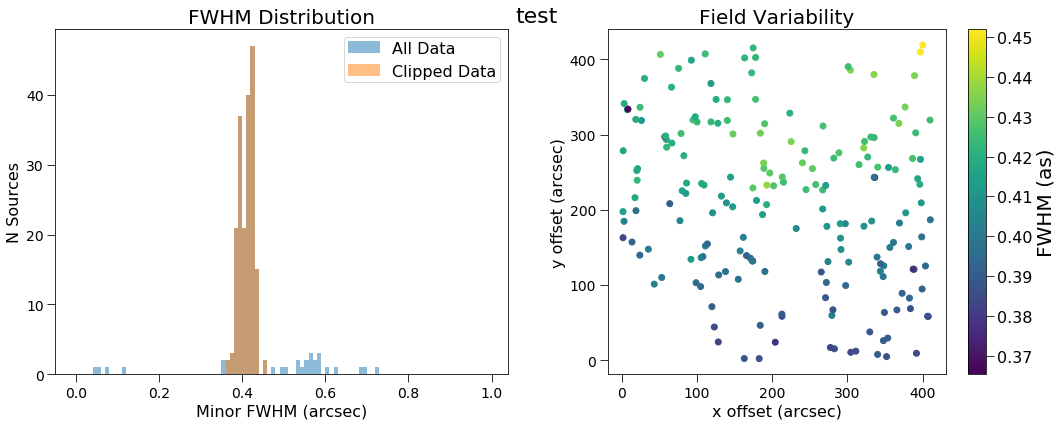

In [7]:
img_file = stack_dir + 'orion_stack_closed_BS.fits' 
starlist = stack_dir + 'orion_stack_closed_B2_stars.txt'
plot_stats.plot_var(img_file, starlist, "Closed (B2)")

### Closed (LS)

N Stars:  195
Mean:  0.40665554179242963
Median:  0.407779774701715
Std Dev:  0.015858138216178444


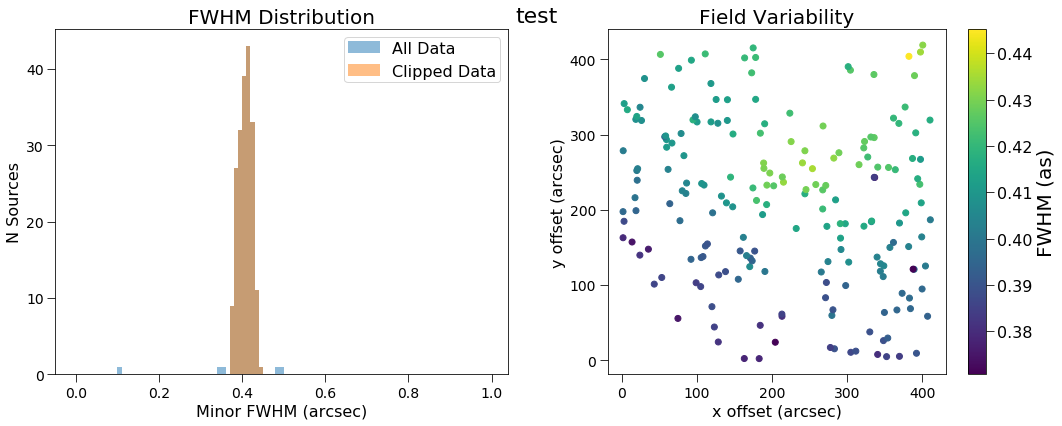

In [8]:
img_file = stack_dir + "orion_stack_closed_LS.fits"
starlist = stack_dir + "orion_stack_closed_LS_stars.txt"
plot_stats.plot_var(img_file, starlist, "Closed (LS)")